In [2]:
%matplotlib inline
import numpy as np;
import matplotlib
import matplotlib.pyplot as plt

$\LaTeX \text{ commands here}
\newcommand{\R}{\mathbb{R}}
\newcommand{\im}{\text{im}\,}
\newcommand{\norm}[1]{||#1||}
\newcommand{\inner}[1]{\langle #1 \rangle}
\newcommand{\span}{\mathrm{span}}
\newcommand{\proj}{\mathrm{proj}}
\newcommand{\OPT}{\mathrm{OPT}}
\newcommand{\grad}{\nabla}
\newcommand{\eps}{\varepsilon}
$

<hr style="border: 5px solid black">

**Georgia Tech, CS 4540**

# L15: Computing Eigenvalues & Eigenvectors

*Thursday, October 11, 2018*

### Outline

* Review of Reading
    * Power Iteration
    * Problem:  Eigenvalues of the Inverse
    * Inverse Iteration
    * Rayleigh Quotient Iteration
* Implementation!
    * (plus an aside about random matrices)
    

# Review of Reading

### Computing Eigenvalues & Eigenvectors

Want to compute the eigenvalues/vectors for a real, symmetric $A \in \R^{m \times m}$.
* Real eigenvalues $\lambda_1, \dots, \lambda_m \in \R$
* Orthonormal eigenvectors $q_1,\dots,q_m \in \R^m$, with $\norm{q_j}_2 = 1$

Assume the eigenvalues are sorted by absolute value, and that there is a dominant eigenvalue:

$$
|\lambda_1| > |\lambda_2| \geq |\lambda_3| \geq \cdots \geq |\lambda_n|
$$

### Recall:  Power Iteration

Compute the dominant eigenvector by repeatedly applying a matrix to the starting vector.

![](images/l15-power-iteration.png)

### Recall:  Power Iteration

![](images/l15-power-iteration-theorem.png)

### Recall:  Inverse Iteration

Compute the eigenvector closest to $\mu$ by using power iteration on the matrix $(A-\mu I)^{-1}$.  We do this to amplify the ratio $|\lambda_2 / \lambda_1|$ from the theorem.

![](images/l15-inverse-iteration.png)

### Problem:  Eigenvalues of the Inverse

Recall that in Lecture 10, you showed that if $A$ has eigenpairs $A v_k = \lambda_k v_k$ for $1 \leq k \leq n$, then the matrix $(A-\alpha I)$ has eigenvectors $\lambda_k - \alpha$ with corresponding eigenvectors $v_k$ .

<div style="padding:10px; margin:10px; border:1px solid black">
<b>Part A:</b> Assuming invertibility, what are the eigenvalues and eigenvectors of $A^{-1}$?
    
<b>Part B:</b> Assuming invertibility, what are the eigenvalues and eigenvectors of $(A - \mu I)^{-1}$, for $\mu \in \R$? 
</div>

### Solution:  Eigenvalues of the Inverse

**Part A:**  Let $A v = \lambda v$.  Then $v = A^{-1} A v = \lambda A^{-1} v$.  That is, $A^{-1} v = \frac{1}{\lambda} v$.  So, $A$ has the same eigenvectors $v_k$ with eigenvalues $\frac{1}{\lambda_k}$.

**Part B:**  From Lecture 10, $(A - \mu I)$ has the same eigenvectors $v_k$ as $A$, with eigenvalues $(\lambda_k - \mu)$.  By the previous part, the matrix $(A-\mu I)^{-1}$ has the same eigenvectors, now with eigenvalues $\frac{1}{\lambda_k - \mu}$.

### Recall:  Inverse Iteration

![](images/l15-inverse-iteration-theorem.png)

### Recall:  Rayleigh Quotient Iteration

![](images/l15-rq-schematic.png)

### Recall:  Rayleigh Quotient Iteration

![](images/l15-rq-algorithm.png)

### Recall:  Rayleigh Quotient Iteration

![](images/l15-rq-theorem.png)

# Implementation!

### Implementation

Write your own code for power iteration, inverse iteration, Rayleigh quotient iteration, etc.

* For a matrix $A$, pretend that the eigenvalues computed by `np.linalg.eig` are exact, and plot/compare the convergence rates for each of your methods.
* Compute the ratio $|\lambda_2 / \lambda_1|$, and verify the convergence rates in the book.

You may find the following helpful:

* `np.linalg.eig`, `np.linalg.inv`, `np.linalg.solve`
* `np.linalg.qr`, `np.linalg.svd`

In [6]:
def power_iteration(A, v0):
    """
    @param A is an mxm symmetric matrix.
    @param v0 is the starting vector.
    """
    result = None;
    return result;

In [7]:
def inverse_iteration(A, v0):
    """
    @param A is an mxm symmetric matrix.
    @param v0 is the starting vector.
    """
    result = None;
    return result;

In [ ]:
def rq_iteration(A, v0):
    """
    @param A is an mxm symmetric matrix.
    @param v0 is the starting vector.
    """
    result = None;
    return result;

### Problem:  Random Matrices

When testing numerical algorithms, it's useful to be able to generate random problem instances.  To generate a random matrix with `numpy`, use either
* `np.random.rand(m,n)` to generate an $(m \times n)$ matrix with random entries in $[0,1]$
* `np.random.randn(m,n)` to generate an $(m \times n)$ matrix with normal-distributed entries

<div style="padding:10px; margin:10px; border: 1px solid black">
<b>Problem:</b> How can you use numpy to generate random matrices of the following types?<br>

<b>Part A:</b> Random diagonal matrix?<br>
<b>Part B:</b> Random upper-triangular matrix?<br>
<b>Part C:</b> Random symmetric matrix?<br>
<b>Part D:</b> Random matrix with orthonormal columns? (*Hint:* SVD or QR factorization)<br>
<b>Part E:</b> Random symmetric matrix, with prescribed eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_m \in \R$?<br>
</div>

> *Challenge:* For any of your methods above, how are the eigenvalues of your random matrix distributed?  Write code to check!  Make a scatterplot of the eigenvalues of 10000 random matrices.  Are they biased at all towards one region of space?  Maybe they're more likely to be positive than negative, etc..  How can you control for this?

### Eigenvalues of Random Matrices

Text(0.5,1,'Eigenvalues of Matrix with Random Gaussian Entries')

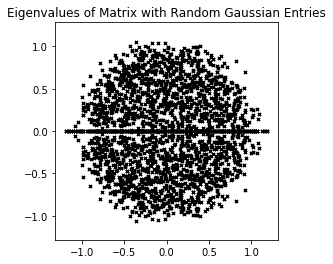

In [10]:
def plot_goe_eigs(n, num_samples):
    eigs = [];
    
    for k in range(num_samples):
        Q = np.random.randn(n,n) / np.sqrt(n);

        # compute eigenvalues
        eigw,eigV = np.linalg.eig(Q);
        eigs += list(eigw);
    
    eigs = np.array(eigs);
    eigx = np.real(eigs);
    eigy = np.imag(eigs);
    fig, ax = plt.subplots(figsize=(4,4))
    plt.scatter(eigx, eigy, marker='x', c='k', s=10);
    ax.set_aspect('equal', 'datalim')
    
plot_goe_eigs(50, 50);
plt.title("Eigenvalues of Matrix with Random Gaussian Entries")